In [21]:
# %%
# Jupyter Notebook cell 1 — Imports
import numpy as np
import pandas as pd

# %%
# Jupyter Notebook cell 2 — Load the CSV file
# Update the path if needed
file_path = "202512_power_scan.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
Fluo_pow       = data["A"].to_numpy()
FWHM_pow       = data["fwhm"].to_numpy()
I_pow       = data["intensity"].to_numpy()
S_pow    = data["S"].to_numpy()


# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("Fluo:", Fluo_pow.shape, "→", Fluo_pow[:5])
print("FWHM_pow:", FWHM_pow.shape, "→", FWHM_pow[:5])
print("I:", I_pow.shape, "→", I_pow[:5])
print("S:", S_pow.shape, "→", S_pow[:5])



,A,fwhm,intensity,S
0,300.077240,9.946400e+07,0.320397,0.049505
1,305.815098,1.067719e+08,0.320397,0.050500
2,337.995382,6.795428e+07,0.320397,0.056112
3,132.560962,1.108078e+08,0.091542,0.021281
4,171.386444,6.673294e+07,0.091542,0.027687


Fluo: (56,) → [300.07724022 305.81509767 337.99538171 132.56096206 171.38644418]
FWHM_pow: (56,) → [9.94639960e+07 1.06771883e+08 6.79542836e+07 1.10807840e+08
 6.67329400e+07]
I: (56,) → [0.32039682 0.32039682 0.32039682 0.09154195 0.09154195]
S: (56,) → [0.04950532 0.05049973 0.05611189 0.02128115 0.02768671]


In [22]:
Rinfty = np.amax(Fluo_pow)*1.005
print(Rinfty)
Gam_pow = FWHM_pow/(1+S_pow)**.5

6361.592008367916


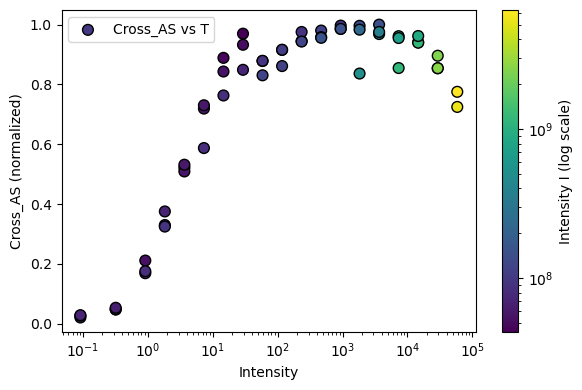

In [23]:
# %%
# (Optional) Example plot with color-coded markers by intensity I (log-scale colormap)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Compute Cross_AS
Cross_AS = Fluo_pow #/ I_pow * Gam_pow / 40e6
Cross_AS = Cross_AS / np.amax(Cross_AS)

# Avoid zero or negative values for log normalization
I_pos = np.clip(Gam_pow, np.min(Gam_pow[Gam_pow > 0]), None)

plt.figure(figsize=(6, 4))

# Scatter plot with log-scale color normalization
sc = plt.scatter(
    I_pow, Cross_AS,
    c=I_pos,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_pos), vmax=np.max(I_pos)),
    s=60,
    edgecolor='k',
    label="Cross_AS vs T"
)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Intensity")
plt.ylabel("Cross_AS (normalized)")
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()

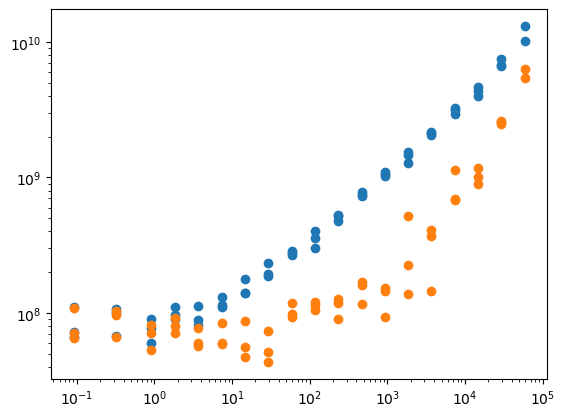

In [24]:
plt.plot(I_pow, FWHM_pow, marker='o', linestyle='none')
plt.plot(I_pow, Gam_pow, marker='o', linestyle='none')

plt.xscale('log')
plt.yscale('log')

In [28]:
# %%
# Jupyter Notebook cell 2 — Load the CSV file
# Update the path if needed
file_path = "202512_temperature_scan.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
T_temp       = data["temperature"].to_numpy()
I_temp       = data["intensity"].to_numpy()
S_temp       = data["S"].to_numpy()
FWHM_temp    = data["fwhm"].to_numpy()
Fluo_temp    = data["A"].to_numpy()

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("T:", T_temp.shape, "→", T_temp[:5])
print("I:", I_temp.shape, "→", I_temp[:5])
print("S:", S_temp.shape, "→", S_temp[:5])
print("FWHM:", FWHM_temp.shape, "→", FWHM_temp[:5])
print("Fluo:", Fluo_temp.shape, "→", Fluo_temp[:5])

Gam_temp = FWHM_temp/(1+S_temp)**.5

,A,fwhm,temperature,intensity,S
0,4179.364970,1.385442e+08,4.1660,6.865646,1.915183
1,3906.119749,1.616217e+08,4.1205,6.865646,1.590781
2,3641.696052,1.315464e+08,4.0290,6.865646,1.338910
3,3663.892454,1.489359e+08,4.2720,6.865646,1.358154
4,3881.023434,1.091647e+08,4.1930,6.865646,1.564570


T: (86,) → [4.166  4.1205 4.029  4.272  4.193 ]
I: (86,) → [6.8656462 6.8656462 6.8656462 6.8656462 6.8656462]
S: (86,) → [1.91518339 1.59078146 1.33891006 1.35815438 1.56457011]
FWHM: (86,) → [1.38544179e+08 1.61621667e+08 1.31546424e+08 1.48935888e+08
 1.09164720e+08]
Fluo: (86,) → [4179.36497049 3906.11974885 3641.69605187 3663.89245435 3881.02343436]


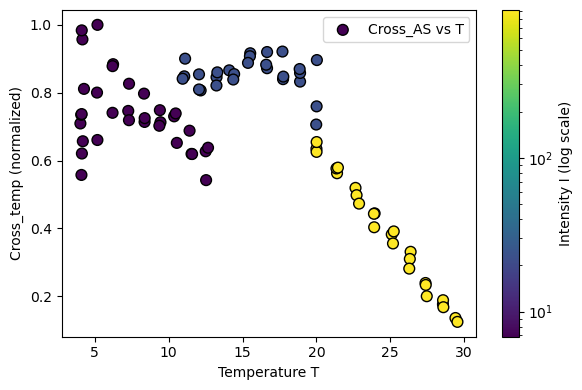

In [29]:
# S in the data set has an offset artificial and it's S+1!!!
# (Optional) Example plot with color-coded markers by intensity I (log-scale colormap)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Compute Cross_AS
Cross_temp = S_temp * FWHM_temp/(1+S_temp)**.5/I_temp
Cross_temp = Cross_temp / np.amax(Cross_temp)

# Avoid zero or negative values for log normalization
I_postemp = np.clip(I_temp, np.min(I_temp[I_temp > 0]), None)

plt.figure(figsize=(6, 4))

# Scatter plot with log-scale color normalization
sctemp = plt.scatter(
    T_temp, Cross_temp,
    c=I_postemp,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_postemp), vmax=np.max(I_postemp)),
    s=60,
    edgecolor='k',
    label="Cross_AS vs T"
)

# Add colorbar
cbar = plt.colorbar(sctemp)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Cross_temp (normalized)")
#plt.yscale('log')
#plt.ylim(0,0.3)
plt.legend()
plt.tight_layout()
plt.show()

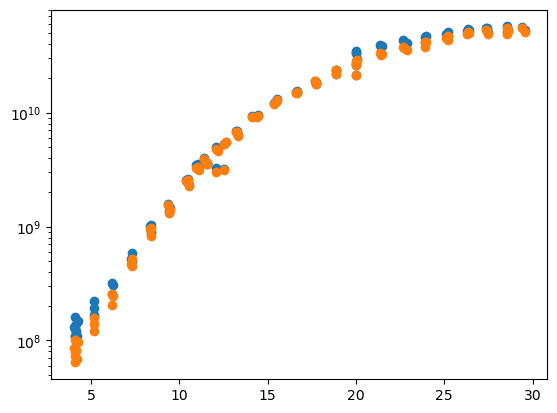

In [31]:
plt.plot(T_temp, FWHM_temp, marker='o', linestyle='none')
plt.plot(T_temp, Gam_temp, marker='o', linestyle='none')

plt.yscale('log')

In [32]:
import numpy as np
from scipy.interpolate import interp1d

# Your data: numpy arrays
# T_temp : array of T values
# Gam_temp : array of Gamma(T) values

# 1. Sort data by T (interp1d requires increasing x)
idx = np.argsort(T_temp)
T_sorted = T_temp[idx]
Gam_sorted = Gam_temp[idx]

# 2. Interpolating Gamma(T)
Gamma_of_T = interp1d(
    T_sorted,
    Gam_sorted,
    kind='cubic',          # or 'linear' if you prefer
    bounds_error=False,    # avoids error outside data range
    fill_value="extrapolate"
)

# 3. (Optional but recommended) Check monotonicity of Gamma(T)
dGam = np.diff(Gam_sorted)
is_increasing = np.all(dGam > 0)
is_decreasing = np.all(dGam < 0)

if not (is_increasing or is_decreasing):
    print("Warning: Gamma(T) is not monotonic -> T(Gamma) will not be single-valued.")

# 4. Build the inverse interpolant T(Gamma)
#    Here we just swap x and y: x = Gamma, y = T
T_of_Gamma = interp1d(
    Gam_sorted,
    T_sorted,
    kind='cubic',
    bounds_error=False,
    fill_value="extrapolate"
)

In [38]:
T_pow = T_of_Gamma(Gam_pow)

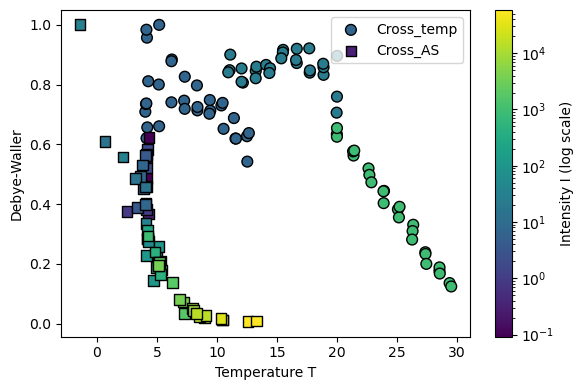

In [39]:
# %%
# Combined plot of Cross_temp_new and Cross_AS (single panel, shared log-scale colormap)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# --- First dataset (temp)
#Snew_temp = Fluo_temp / Rinfty / (1 - Fluo_temp / Rinfty)
Cross_temp_new = S_temp * Gam_temp / I_temp
Cross_temp_new = Cross_temp_new / np.amax(Cross_temp_new)
I_postemp = np.clip(I_temp, np.min(I_temp[I_temp > 0]), None)

# --- Second dataset (AS)
Cross_AS = (S_pow / I_pow * Gam_pow )
Cross_AS = Cross_AS / np.amax(Cross_AS)
I_pos = np.clip(I_pow, np.min(I_pow[I_pow > 0]), None)

# --- Determine common color scale for both datasets
vmin = min(np.min(I_postemp), np.min(I_pos))
vmax = max(np.max(I_postemp), np.max(I_pos))
norm = LogNorm(vmin=vmin, vmax=vmax)

# --- Create combined figure
plt.figure(figsize=(6, 4))

# Plot both datasets with same colormap and normalization
sc1 = plt.scatter(
    T_temp, Cross_temp_new,
    c=I_postemp,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='o',
    label="Cross_temp"
)

sc2 = plt.scatter(
    T_pow, Cross_AS,
    c=I_pos,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='s',
    label="Cross_AS"
)

# --- Colorbar and labels
cbar = plt.colorbar(sc1)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Debye-Waller")
#plt.yscale('log') 
#plt.xscale('log') 
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
print(np.amin(T_pow))

-1.4230454260495102


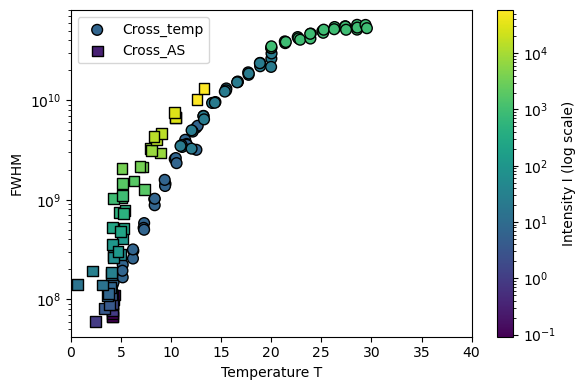

In [42]:

# --- First dataset (temp)
Snew_temp = Fluo_temp / Rinfty / (1 - Fluo_temp / Rinfty)
Cross_temp_new = Snew_temp * Gam_temp / I_temp
Cross_temp_new = Cross_temp_new / np.amax(Cross_temp_new)
I_postemp = np.clip(I_temp, np.min(I_temp[I_temp > 0]), None)

# --- Second dataset (AS)
Cross_AS = (S_pow / I_pow * Gam_pow )
Cross_AS = Cross_AS / np.amax(Cross_AS)
I_pos = np.clip(I_pow, np.min(I_pow[I_pow > 0]), None)

# --- Determine common color scale for both datasets
vmin = min(np.min(I_postemp), np.min(I_pos))
vmax = max(np.max(I_postemp), np.max(I_pos))
norm = LogNorm(vmin=vmin, vmax=vmax)

# --- Create combined figure
plt.figure(figsize=(6, 4))

# Plot both datasets with same colormap and normalization
sc1 = plt.scatter(
    T_temp, FWHM_temp,
    c=I_postemp,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='o',
    label="Cross_temp"
)

sc2 = plt.scatter(
    T_pow, FWHM_pow,
    c=I_pos,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='s',
    label="Cross_AS"
)

# --- Colorbar and labels
cbar = plt.colorbar(sc1)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("FWHM")
plt.yscale('log') 
#plt.xscale('log') 
plt.xlim(0,40)
#plt.ylim(0,1e10)
plt.legend()
plt.tight_layout()
plt.show()